In [ ]:
%matplotlib inline

## The FDataGrid class

In order to use scikit-fda, first we need functional data to analyze.
A common case is to have each functional observation measured at the same
points.
This kind of functional data is easily representable in scikit-fda using
the :class:`~skfda.representation.grid.FDataGrid` class.

The :class:`~skfda.representation.grid.FDataGrid` has two important
attributes: ``data_matrix`` and ``grid_points``. The attribute
``grid_points`` is a tuple with the same length as the number of domain
dimensions (that is, one for curves, two for surfaces...). Each of its
elements is a 1D numpy :class:`~numpy.ndarray` containing the measurement
points for that particular dimension. The attribute ``data_matrix`` is a
numpy :class:`~numpy.ndarray` containing the measured values of the
functions in the grid spanned by the grid points. For functions
$\{f_i: \mathbb{R}^p \to \mathbb{R}^q\}_{i=1}^N$ this is a tensor
with dimensions $N \times M_1 \times \ldots \times M_p \times q$,
where $M_i$ is the number of measurement points for the domain
dimension $i$.



In order to create a :class:`~skfda.representation.grid.FDataGrid`, these
attributes may be provided. The attributes are converted to
:class:`~numpy.ndarray` when necessary.



<div class="alert alert-info"><h4>Note</h4><p>The grid points can be omitted,
    and in that case their number is inferred from the dimensions of
    ``data_matrix`` and they are automatically assigned as equispaced points
    in the unitary cube in the domain set.

    In the common case of functions with domain dimension of 1, the list of
    grid points can be passed directly as ``grid_points``.

    If the codomain dimension is 1, the last dimension of ``data_matrix``
    can be dropped.</p></div>



The following example shows the creation of a
:class:`~skfda.representation.grid.FDataGrid` with two functions (curves)
$\{f_i: \mathbb{R} \to \mathbb{R}\}, i=1,2$ measured at the same
(non-equispaced) points.



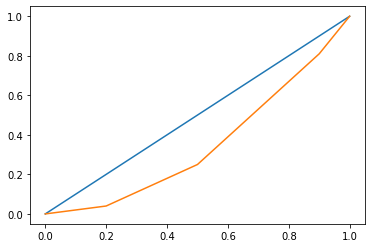

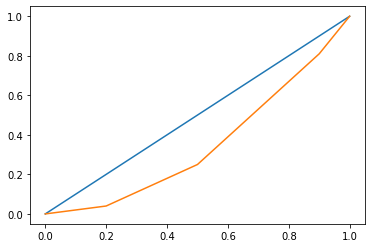

In [1]:
import skfda

grid_points = [0, 0.2, 0.5, 0.9, 1]  # Grid points of the curves
data_matrix = [
    [0, 0.2, 0.5, 0.9, 1],     # First observation
    [0, 0.04, 0.25, 0.81, 1],  # Second observation
]

fd = skfda.FDataGrid(
    data_matrix=data_matrix,
    grid_points=grid_points,
)

fd.plot()

Once your data has been introduced as a :class:`~numpy.ndarray` instance,
you will need to give it the proper dimensions and use it to instantiate
a functional data object.



<div class="alert alert-info"><h4>Note</h4><p>:class:`Pandas DataFrames <pandas.DataFrame>` are also popular as
    datasets containers in the Python scientific ecosystem. If you have
    data in a Pandas DataFrame, you can extract its content as a Numpy
    array using the method :meth:`~pandas.DataFrame.to_numpy` of the
    DataFrame.</p></div>



### Datasets from CRAN

If you want to work with a dataset for which no fetching function exist, and
you know that is available inside a R package in the CRAN repository, you
can try using the function :func:`~skfda.datasets.fetch_cran`. This function
will load the package, fetch the dataset and convert it to Python objects
using the packages
`scikit-datasets <https://github.com/daviddiazvico/scikit-datasets>`_ and
`RData <https://rdata.readthedocs.io>`_. As datasets in CRAN follow no
particular structure, you will need to know how it is structured internally
in order to use it properly.



<div class="alert alert-info"><h4>Note</h4><p>Functional data objects from some packages, such as
    `fda.usc <https://cran.r-project.org/web/packages/fda.usc/index.html>`_
    are automatically recognized as such and converted to
    :class:`~skfda.representation.grid.FDataGrid` instances. This
    behaviour can be disabled or customized to work with more packages.</p></div>



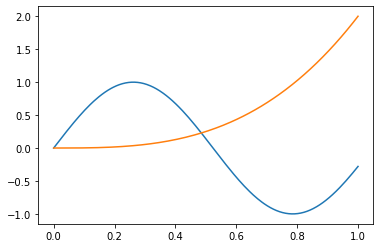

In [17]:
import numpy as np
t = np.linspace(0, 1, 100)

fd = skfda.FDataGrid(
    data_matrix=[
        np.sin(6 * t),  # First function
        2 * t**3,          # Second function
    ],
    grid_points=t,
)

fig=fd.plot()

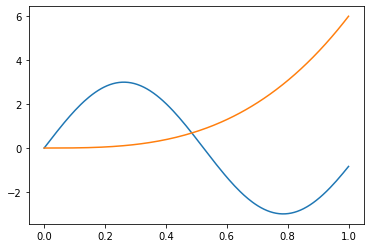

In [16]:
scalar_mul = 3 * fd

fig=scalar_mul.plot()

<ipython-input-15-adaa440c2310>:4: RuntimeWarning: divide by zero encountered in log
  np.log(t),              # Second function


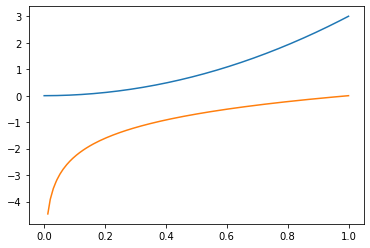

In [15]:
fd2 = skfda.FDataGrid(
    data_matrix=[
        3 * t**2,              # First function
        np.log(t),              # Second function
    ],
    grid_points=t,
)

fig=fd2.plot()

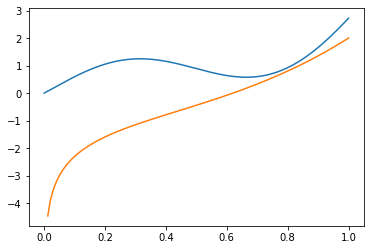

In [12]:
fd_sum = fd + fd2

a=fd_sum.plot()

In [18]:
type(fig)

matplotlib.figure.Figure